In [16]:
from typing import List

# Basic

# 1. Two Sum
Hint: Hasmap {value: index}
* Create a hash map to store {value: index}
* Var diff = target - index
* If diff is in the hash map -> return the indexes

In [3]:
def two_sum(arr: List[int], target: int) -> List[int]:
    hash = {}
    for index, value in enumerate(arr):
        diff = target - value
        if diff in hash:
            return [hash[diff], index]
        hash[value] = index
    return None

two_sum([2,1,8,3], 4)

[1, 3]

# 1.1 Two Sum II
Array is sorted and not return index (not zero-based)

In [6]:
# def two_sum_2(arr: List[int], target: int) -> List[int]:
#     left, right = 0, len(arr)-1
#     while left < right:
#         curSum = arr[left] + arr[right]
#         if curSum == target:
#             return [left+1, right+1]
#         if curSum > target:
#             right -= 1
#         else:
#             left += 1
#     return None


# two_sum_2([1,3,4,5,7,10,11], 9)



def two_sum_2(arr: List[int], target: int) -> List[int]:
    left, right = 0, len(arr)-1
    while left < right:
        curSum = arr[left] + arr[right]
        if curSum > target:
            right -= 1
        elif curSum < target:
            left += 1
        else:
            return [left+1, right+1] 
    return None


two_sum_2([1,3,4,5,7,10,11], 9)

[3, 4]

# 2. Best Time to Buy and Sell Stock
Hint: Sliding window

* Sliding window -> 2 pointers: left - buy, right - sell
* Create maxProfit var
* Conditional check: 
    * if left is less than right: calc profit and update the maxProfit
    * else: left = right
* Move the right pointer
* Return the maxProfit


In [18]:
def max_profit(price: List[int]) -> int:
    left, right = 0, 1
    maxProfit = 0
    while right < len(price):
        if price[left] < price[right]:
            profit = price[right] - price[left]
            maxProfit = max(maxProfit, profit)
        else: 
            left = right
        right += 1
    return maxProfit

max_profit([7, 1, 5, 3, 6, 4])

5

# 3. Contains Duplicate
Hint: Set
* Create a set
* Condition: 
    * the number is in the set, return True
    * otherwise add the number to the set
* Default return false

In [6]:
def contain_duplicate(arr: List[int]) -> bool:
    hash_set= set()
    for i in arr:
        if i in hash_set:
            return True
        hash_set.add(i)
    return False

contain_duplicate([2, 3, 4, 1, 4])

True

# 4. Product of Array Excelpt Self
Given an array of num, return an array in which array[i] is equal to the product of all the elements, except that num

`Cannot use division and time: O(n). If allowed, just multiply all the nums and append num = product / arr[i]`
* Init `output` arr same size of input arr with value 1
* Create `prefix` and `postfix` at position 1
* Loop 1:
    * `output` arr at current index is `prefix` (storing prefix value)
    * multiply `prefix` value with current value of current index in the input arr
* Loop 2 reverse until -1:
    * `output` arr multiply with `postfix` (keep storing the value, not overriding)
    * multiply `postfix` with current value of current index in the input arr
* Retun the output

In [12]:
from typing import List

def product_except_self(arr: List[int]) -> List[int]:
    # Initialize a result array of the same length as the input array.
    result = [1] * (len(arr))
    
    # Initialize a prefix variable to store the product of elements to the left of the current element.
    prefix = 1
    
    # Calculate the prefix products.
    for i in range(len(arr)):
        # Store the current prefix value in the result array.
        result[i] = prefix
        
        # Update the prefix by multiplying it with the current element.
        prefix *= arr[i]
    
    # Initialize a postfix variable to store the product of elements to the right of the current element.
    postfix = 1
    
    # Calculate the postfix products and multiply them with the corresponding elements in the result array.
    for i in range(len(arr) - 1, -1, -1):
        # Multiply the current result value by the current postfix value.
        result[i] *= postfix
        
        # Update the postfix by multiplying it with the current element.
        postfix *= arr[i]
    
    # Return the final result array containing the product of all elements except the current element.
    return result

# Example usage:
product_except_self([4, 5, 6, 7])


[210, 168, 140, 120]

# 5. Maximum Subarray
Finding the largest sum

Hint: Sliding window
* Create `maxSum` and `current sum`. `MaxSum` = the first elem of arr (because max sum can be negative), current = 0
* Loop:
    * check if `curSum` < 0 -> set back to 0
    * sum the index-val to curSum
    * update the `maxSum` by selecting the greate value between maxSum and curSum


In [18]:
def maxSubArray(arr: List[int]) -> int:
    maxSum = arr[0]
    curSum = 0
    for i in arr:
        if curSum < 0:
            curSum = 0
        curSum += i
        maxSum = max(maxSum, curSum)
    return maxSum

maxSubArray([-2, -1, -3, 4, -1, 2, 1, -5, 4])

6

# 6. Maximum Product Subarray: DP

Dynamic Programming
* Set init value of the `result` to max value in the arr (because arr can have one element and it can be a negative number)
* `curMax` and `curMin` are set to 1
* Loop:
    * if current element is 0 then reset `curMax` and `curMin` to 1
    * before updating curmax store it in a `temp` var
    * `curMax` is maximum of n*CurMax, n*CurMin, n
    * `curMin` is minimum of temp*CurMax, n*CurMin, n
    * update `result` is max of `result` and `curMax`

Time Complexity: O(n)
Memory Complexity: O(1)

In [1]:
from typing import List

def max_product_subarray(arr: List[int]) -> int:
    # Initialize the result variable to the maximum value in the input array.
    result = max(arr)
    
    # Initialize two variables to track the current maximum and minimum products.
    cur_max, cur_min = 1, 1
    
    # Iterate through the elements in the input array.
    for i in arr:
        # Check if the current element is 0.
        if i == 0:
            # If it's 0, reset both current maximum and minimum to 1.
            cur_max, cur_min = 1, 1
            continue

        # Store the current maximum value before updating it.
        temp = cur_max * i
        
        # Update the current maximum and minimum values.
        cur_max = max(i * cur_max, i * cur_min, i)
        cur_min = min(temp, i * cur_min, i)
        
        # Update the result with the maximum of the current result and current maximum.
        result = max(result, cur_max)
    
    # Return the final result, which represents the maximum product subarray.
    return result


# max_product_subarray([2, 3, -2, 4])
max_product_subarray([-2,0,-1])

0

# 7. Minimum in rotated Sorted Array
Hint: Binary search

* create `output` var at the first element of the array
* `left` and `right` pointers at the first and last element of the array
* Loop:
    * left is less or equal to right
    * check if the array is sorted -> left value is less than right value -> `output` is min of `output` value and arr[left] value -> break the loop
    * create `middle` poiter
    * update `output` -> min(output, arr[middle])
    * condition: 
        * arr[middle] is greater than arr[left] -> `left` is `middle` + 1
        * else -> `right` is `middle` - 1
* return the `output`



In [3]:
def findMin(arr: List[int]) -> int:
    output = arr[0]  # Initialize the output to the first element of the array.
    left, right = 0, len(arr) - 1  # Initialize two pointers, 'left' and 'right,' to the start and end of the array.
    
    while left <= right:  # Perform a binary search until 'left' is less than or equal to 'right.'
        if arr[left] < arr[right]:  # If the array is sorted in ascending order, set the output to the leftmost element and break.
            output = min(output, arr[left])
            break
        
        middle = right - left // 2  # Calculate the middle index.
        print(f"middle: {middle} - value in the arr: {arr[middle]}")
        output = min(output, arr[middle])  # Update the output with the minimum of the current output and the middle element.
        
        if arr[middle] > arr[left]:  # Check if the middle element is greater than the leftmost element.
            left = middle + 1  # If so, update 'left' to be one past the middle (move right).
        else:
            right = middle - 1  # Otherwise, update 'right' to be one before the middle (move left).
    
    return output  # Return the minimum element found.

findMin([4,5,6,7,0,1,2])
# findMin([3,4,5,1,2])

middle: 6 - value in the arr: 2
middle: 5 - value in the arr: 1
middle: 4 - value in the arr: 0


0

# 8. Search in rotated sorted array

Hint: binary search
* 

In [3]:
def search_sortedArr(arr: List[int], target: int) -> int:
    left, right = 0, len(arr) - 1
    while left <= right:
        middle = (left + right) // 2  # Calculate the middle index correctly
        if target == arr[middle]:  # If the target is found at the middle, return it
            return arr[middle]

        # Check which half of the array the middle element belongs to.
        if arr[left] <= arr[middle]:  # Left half is sorted
            if target > arr[middle] or target < arr[left]:
                left = middle + 1  # If the target is not in the left sorted half, search the right half.
            else:
                right = middle - 1  # Otherwise, search the left sorted half.
        else:  # Right half is sorted
            if target < arr[middle] or target > arr[right]:
                right = middle - 1  # If the target is not in the right sorted half, search the left half.
            else:
                left = middle + 1  # Otherwise, search the right sorted half.

    return -1  # If the target is not found in the array, return -1.

search_sortedArr([4,5,6,7,1,2,3], 7)

7

# 9. Threesum to Zero - No duplicates
Find all unique triplets in the arr that give the sum of zero.

In [3]:
def threeSum(arr: List[int]) -> List[List[int]]:
    output = []  # Initialize an empty list to store the triplets.
    arr.sort()   # Sort the input list in ascending order.
    print(arr)
    for index, value in enumerate(arr):
        # Skip duplicate values at the same index. 
        # Since lists in Python support negative indices as a way to access elements from the end of the list, 
        # arr[-1] would refer to the last element in the list, not the element before the current one.
        if index > 0 and value == arr[index - 1]:
            print(f"value: {value} at index: {index} skipped")
            continue

        left, right = index + 1, len(arr) - 1  # Initialize two pointers.

        while left < right:
            # Calculate the sum of the current triplet.
            sum = value + arr[left] + arr[right]
            print(f"Sum: {arr[left]}+{arr[right]}+{value} = {sum}")
            
            if sum > 0:
                right -= 1  # If the sum is greater than zero, move the right pointer leftward.
            elif sum < 0:
                left += 1   # If the sum is less than zero, move the left pointer rightward.
            else:
                # If the sum is zero, it's a valid triplet. Add it to the output list.
                output.append([value, arr[left], arr[right]])
                left += 1  # Move the left pointer rightward.

                # Skip duplicate values to avoid duplicate triplets. 
                # When a valid triplet is found and added to the output, 
                # we want to ensure that we don't include the same values in any subsequent triplets. 
                # This condition helps us skip over the duplicates and move to the next unique values.
                while arr[left] == arr[left - 1] and left < right:
                    left += 1

    return output


threeSum([-3,3,4,-3,1,2])

[-3, -3, 1, 2, 3, 4]
Sum: -3+4+-3 = -2
Sum: 1+4+-3 = 2
Sum: 1+3+-3 = 1
Sum: 1+2+-3 = 0
value: -3 at index: 1 skipped
Sum: 2+4+1 = 7
Sum: 2+3+1 = 6
Sum: 3+4+2 = 9


[[-3, 1, 2]]

# 10. Container with Most Water


In [3]:
def maxArea(height: List[int]) -> int:
    result = 0
    left, right = 0, len(height) - 1
    
    while left < right:
        area = (right-left) * min(height[left], height[right])
        result = max(result, area)
        
        if height[left] < height[right]:
            left += 1
        else: # left is higer and both are equal
            right -= 1
    
    return result

maxArea([2,3,5,8,1,3,4,5,9])
            
    

40

# 11. Missing Number: Review

In [9]:
def missingNum(arr: List[int]) -> int:
    output = len(arr)
    for i in range(len(arr)):
        print(f"output before: {output}")
        print(f"{i} - {arr[i]} = {i - arr[i]}")
        print(f"output after: {output} + {i - arr[i]}")
        output += (i - arr[i])
    return output

missingNum([3,1,0])

output before: 3
0 - 3 = -3
output after: 3 + -3
output before: 0
1 - 1 = 0
output after: 0 + 0
output before: 0
2 - 0 = 2
output after: 0 + 2


2

# 12. Reverse Bits - skipped

# 13. Climbing Stairs: DP

In [1]:
def climbing_stairs(n: int) -> int:
    one, two = 1, 1
    for i in range(n - 1):
        print(f"iter: {i}")
        temp = one
        one = one + two
        two = temp
        print(f"number of steps required: {one}")
    return one

climbing_stairs(5)

iter: 0
number of steps required: 2
iter: 1
number of steps required: 3
iter: 2
number of steps required: 5
iter: 3
number of steps required: 8


8

# 14. Coin Change: DP

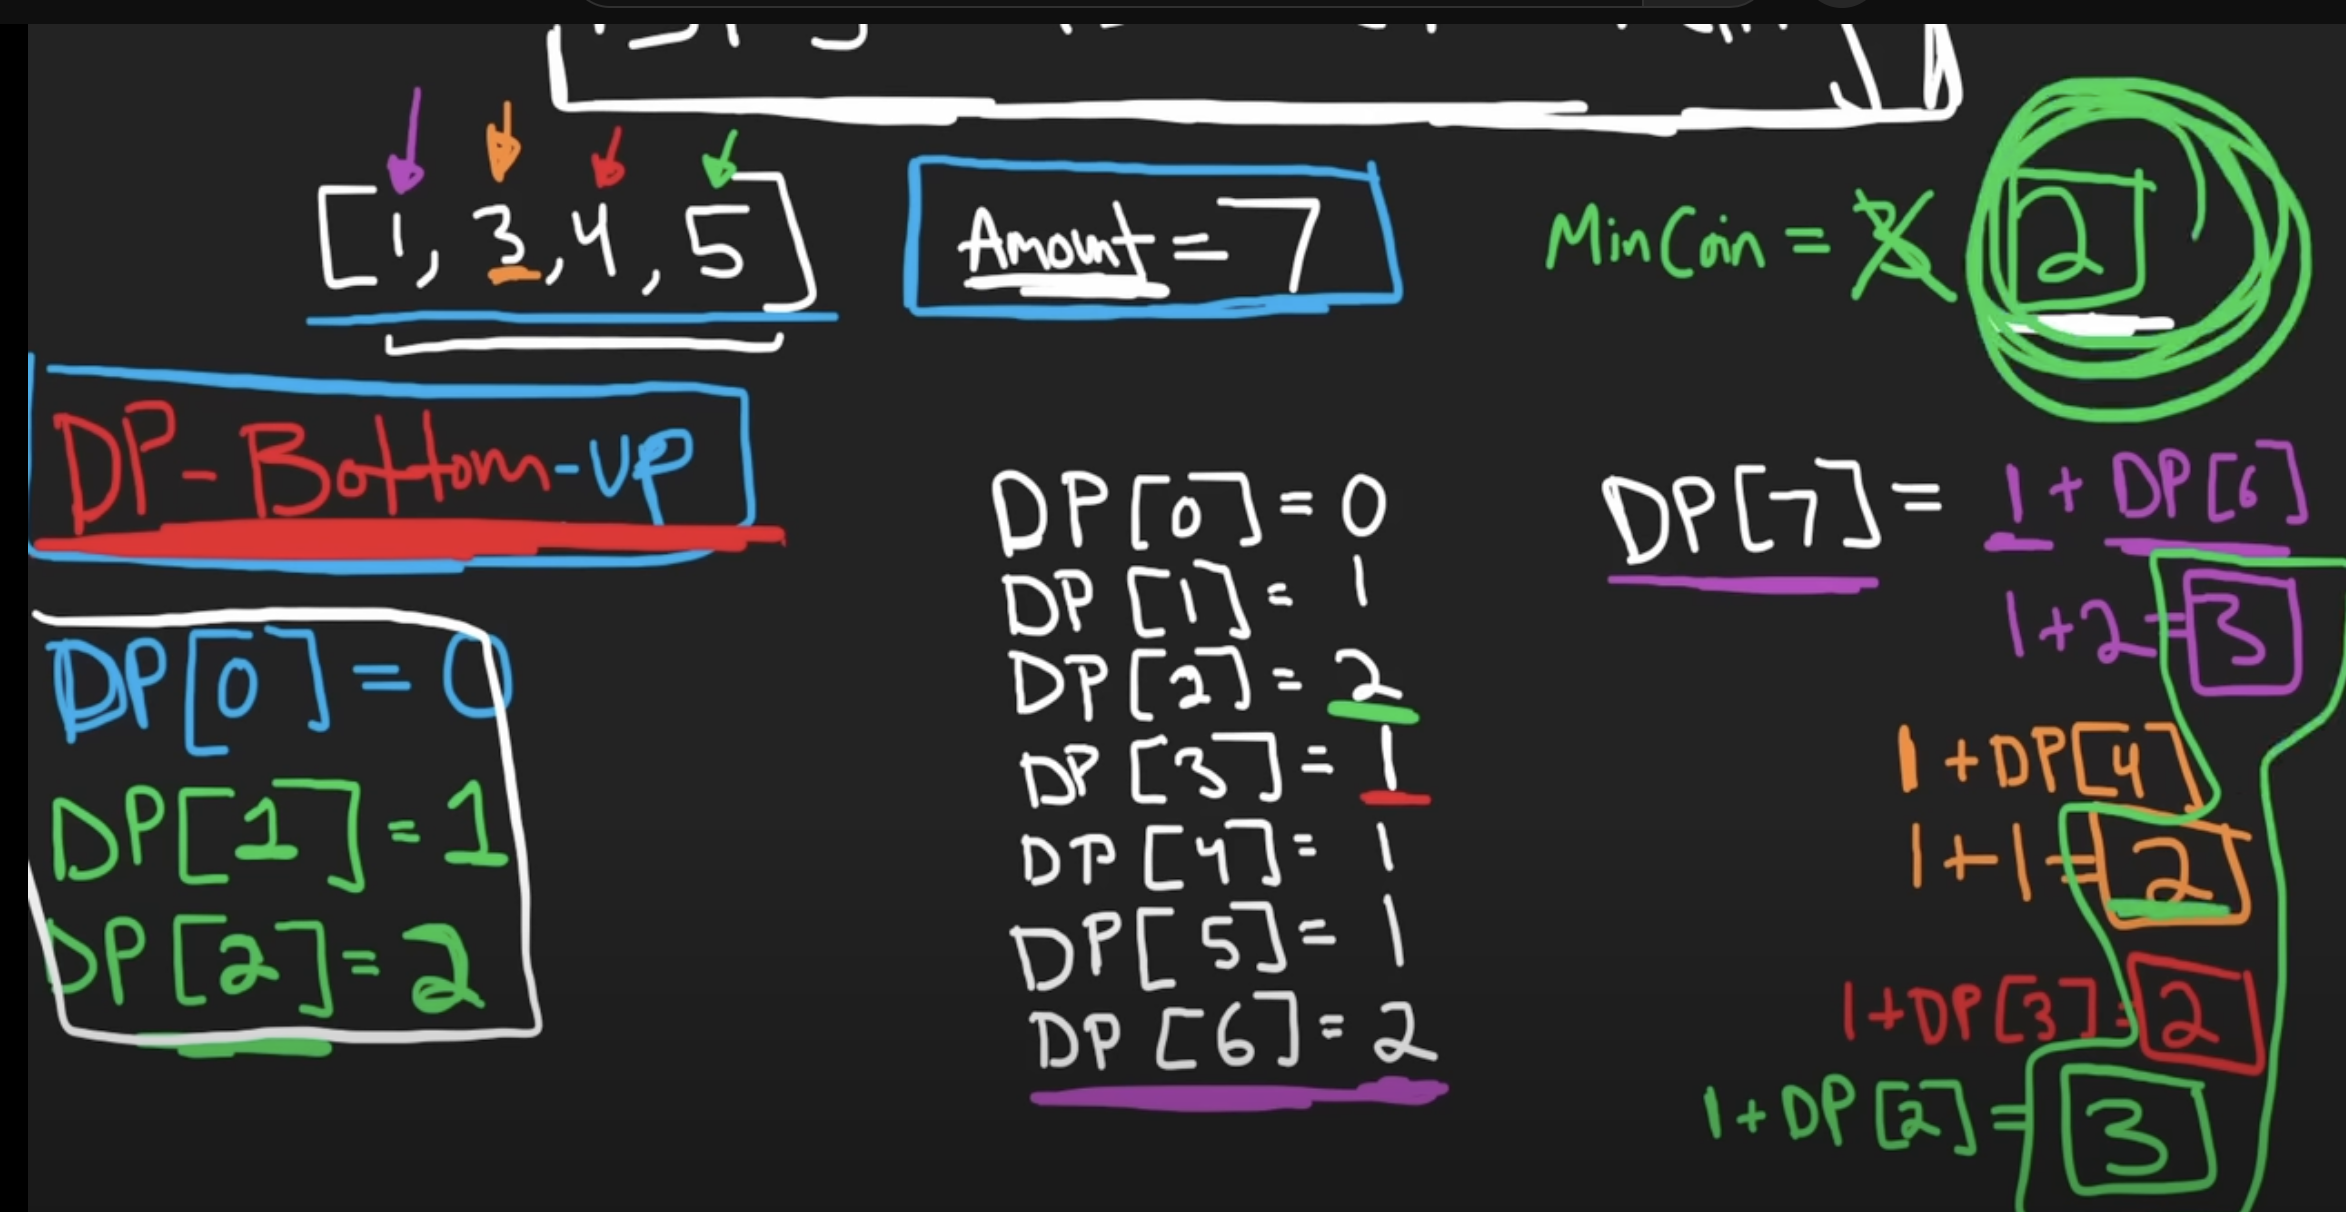

In [2]:
def coin_change(coins, amount) -> int:
    # Create a list to store minimum number of coins needed for each amount from 0 to 'amount'.
    # Initialize all values with 'amount + 1' as an indicator that they are not yet computed.
    dp = [amount + 1] * (amount + 1)
    dp[0] = 0
    print(dp)
    # Iterate through each amount from 1 to 'amount'.
    for a in range(1, amount + 1):
        # Iterate through each coin in the 'coins' list.
        for c in coins:
            # Check if the current coin 'c' can be used for the current amount 'a'.
            if a - c >= 0:
                # Update dp[a] with the minimum of its current value and dp[a - c] + 1.
                # The '+1' accounts for using one coin of denomination 'c'.
                dp[a] = min(dp[a], 1 + dp[a - c])
                
    # If dp[amount] is still 'amount + 1', it means it was never updated, which indicates
    # that it's not possible to make change for 'amount' using the given coins.
    # In this case, return -1. Otherwise, return the computed value.
    return dp[amount] if dp[amount] != amount + 1 else -1

coins = [1, 3, 4, 5]
amount = 7
result = coin_change(coins, amount)
print(f"Minimum number of coins to make change for {amount} is: {result}")


[0, 8, 8, 8, 8, 8, 8, 8]
Minimum number of coins to make change for 7 is: 2


# 15. Flatten Deeply Nested Array: Recursion

In [8]:
def flat(arr, n):
    result = []
    def helper(arr, depth):
        for val in arr:
            if type(val) is list and depth < n:
                helper(val, depth+1)
            else:
                result.append(val)
        return result
    return helper(arr, 0)


test_arr2 = [0, 1, [2, [3, [4, 5]]]]
result_arr = flat(test_arr2, 3)
print(result_arr)

[0, 1, 2, 3, 4, 5]


In [3]:
def flat(arr):
    result = []
    def helper(arr):
        for val in arr:
            if type(val) is list:
                helper(val)
            else:
                result.append(val)
        return result
    return helper(arr)


test_arr2 = [0, 1, [2, [3, [4, 5], [[1,2]]]]]
result_arr = flat(test_arr2)
print(result_arr)

[0, 1, 2, 3, 4, 5, 1, 2]


# 16. Longest increasing subsequence: Dynamic programming

In [6]:
def lengthOfLis(arr):
    LIS = [1] * len(arr)
    for i in range(len(arr) - 1, -1, -1):
        for j in range(i+1, len(arr)):
            if arr[i] < arr[j]:
                LIS[i] = max(LIS[i], 1 + LIS[j])
                print(f"LIS is {LIS}")
    return max(LIS)

lengthOfLis([10,9,2,5,3,7,101,18])

LIS is [1, 1, 1, 1, 1, 2, 1, 1]
LIS is [1, 1, 1, 1, 1, 2, 1, 1]
LIS is [1, 1, 1, 1, 3, 2, 1, 1]
LIS is [1, 1, 1, 1, 3, 2, 1, 1]
LIS is [1, 1, 1, 1, 3, 2, 1, 1]
LIS is [1, 1, 1, 3, 3, 2, 1, 1]
LIS is [1, 1, 1, 3, 3, 2, 1, 1]
LIS is [1, 1, 1, 3, 3, 2, 1, 1]
LIS is [1, 1, 4, 3, 3, 2, 1, 1]
LIS is [1, 1, 4, 3, 3, 2, 1, 1]
LIS is [1, 1, 4, 3, 3, 2, 1, 1]
LIS is [1, 1, 4, 3, 3, 2, 1, 1]
LIS is [1, 1, 4, 3, 3, 2, 1, 1]
LIS is [1, 2, 4, 3, 3, 2, 1, 1]
LIS is [1, 2, 4, 3, 3, 2, 1, 1]
LIS is [2, 2, 4, 3, 3, 2, 1, 1]
LIS is [2, 2, 4, 3, 3, 2, 1, 1]


4

# Longest Common Subsequence - Dynamic Programming